In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
dataset = pd.read_excel('sembako.xlsx')

In [47]:
dataset.head()

,sembako,jumlah,harga,terjual
0,Beras,44,72000,0
1,Minyak,27,48000,1
2,Gula,30,54000,1
3,Sarden,36,61000,0
4,Telor,40,50000,0


In [48]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [49]:
print(x)

[[72000     0]
 [48000     1]
 [54000     1]
 [61000     0]
 [50000     0]]


In [50]:
print(y)

[0 1 1 0 0]


In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [52]:
print(x_train)

[[48000     1]
 [61000     0]
 [50000     0]]


In [53]:
len(x_train)

3

In [54]:
len(x)

5

In [55]:
len(x_test)

2

In [56]:
len(y)

5

In [57]:
len(y_test)

2

In [58]:
len(y_train)

3

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [60]:
print(x_train)

[[-0.87481777  1.41421356]
 [ 1.39970842 -0.70710678]
 [-0.52489066 -0.70710678]]


In [61]:
print(x_test)

[[ 0.17496355  1.41421356]
 [ 3.32430751 -0.70710678]]


In [75]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
y_pred = classifier.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 0]
 [1 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


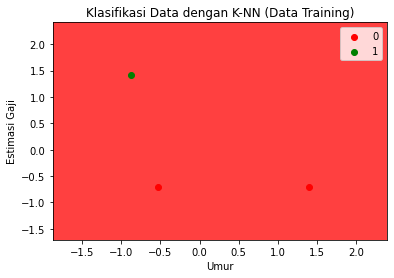

In [78]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=0.01),
                     np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel (), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()